Model Evaluation - Classification Template

In [1]:
import pandas as pd
import numpy as np
import joblib
import warnings
warnings.filterwarnings('ignore')

from expected_disposal_model.config import modelling_file_path, model_output_path
from expected_disposal_model.modelling_data_contract import ModellingDataContract
from expected_disposal_model.evaluation.model_evaluation import XGBClassifierEvaluator

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

%load_ext autoreload
%autoreload 2

Model

In [2]:
model_version = 2
model_name = "disposal"

Response

In [3]:
RESPONSE = ModellingDataContract.RESPONSE

Features

In [4]:
FEATURES = ModellingDataContract.feature_list

Load Data

In [5]:
modelling_data = pd.read_csv(modelling_file_path)
modelling_data.tail()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Season,action_type,Contested,Mark,Free,From_Centre_Bounce,Kick_Inside50,To_Ball_Up,From_Ball_Up,Rushed_Behind,Contest_Target,Goal,Behind,To_Out_On_Full,From_Out_On_Full,Error,From_Kick_In,end_x,end_y,pitch_start_x,pitch_start_y,pitch_end_x,pitch_end_y,left_right_start_x,left_right_start_y,left_right_end_x,left_right_end_y,start_distance_to_right_goal,end_distance_to_right_goal,Inside50,1,2,3,4,Duration,match_id,chain_number,order,quarter,quarter_seconds,overall_seconds,team,player,contested,mark,outcome_type,type_Kick_a0,type_Handball_a0,outcome_effective_a0,outcome_ineffective_a0,outcome_clanger_a0,type_Kick_outcome_effective_a0,type_Kick_outcome_ineffective_a0,type_Kick_outcome_clanger_a0,type_Handball_outcome_effective_a0,type_Handball_outcome_ineffective_a0,type_Handball_outcome_clanger_a0,quarter_a0,quarter_seconds_a0,overall_seconds_a0,left_right_start_x_a0,left_right_start_y_a0,left_right_end_x_a0,left_right_end_y_a0,dx_a0,dy_a0,movement_a0,contested_a0,mark_a0,type_Kick_a1,type_Handball_a1,outcome_effective_a1,outcome_ineffective_a1,outcome_clanger_a1,type_Kick_outcome_effective_a1,type_Kick_outcome_ineffective_a1,type_Kick_outcome_clanger_a1,type_Handball_outcome_effective_a1,type_Handball_outcome_ineffective_a1,type_Handball_outcome_clanger_a1,quarter_a1,quarter_seconds_a1,overall_seconds_a1,left_right_start_x_a1,left_right_start_y_a1,left_right_end_x_a1,left_right_end_y_a1,dx_a1,dy_a1,movement_a1,contested_a1,mark_a1,type_Kick_a2,type_Handball_a2,outcome_effective_a2,outcome_ineffective_a2,outcome_clanger_a2,type_Kick_outcome_effective_a2,type_Kick_outcome_ineffective_a2,type_Kick_outcome_clanger_a2,type_Handball_outcome_effective_a2,type_Handball_outcome_ineffective_a2,type_Handball_outcome_clanger_a2,quarter_a2,quarter_seconds_a2,overall_seconds_a2,left_right_start_x_a2,left_right_start_y_a2,left_right_end_x_a2,left_right_end_y_a2,dx_a2,dy_a2,movement_a2,contested_a2,mark_a2,team_1,team_2,time_delta1,time_delta2,dx_a01,dy_a01,move_a01,dx_a02,dy_a02,move_a02,goalscore_team,goalscore_opponent,goalscore_diff,Disposal_Response,Disposal_ResponseTrainingSet,Disposal_ResponseTestSet,Disposal_ResponseValidationSet
466211,240,ballUp,endQuarter,1845.0,4,1755,1771.0,Collingwood,Collingwood,Scott Pendlebury,Scott_Pendlebury,Kick,-45.0,-38.0,effective,NaN,NaN,141,160,Collingwood,Brisbane Lions,right,2023F4_Collingwood_BrisbaneLions,2023F4,NaN,2023.0,Kick,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-29.0,-34.0,-45.0,-38.0,-29.0,-34.0,-45.0,-38.0,-29.0,-34.0,130.648383,114.179683,NaN,2025.0,2134.0,1823.0,1805.0,7753.0,2023F4_Collingwood_BrisbaneLions,240,1845.0,4,1771.0,7753.0,Collingwood,Scott Pendlebury,NaN,NaN,effective,True,False,True,False,False,True,False,False,False,False,False,4,1771.0,7753.0,-45.0,-38.0,-29.0,-34.0,16.0,4.0,16.492423,NaN,NaN,True,False,True,False,False,True,False,False,False,False,False,4,1768.0,7750.0,-23.0,-35.0,-45.0,-38.0,-22.0,-3.0,22.203603,NaN,NaN,False,True,False,True,False,False,False,False,False,True,False,4,1736.0,7718.0,-27.0,-33.0,-23.0,-35.0,4.0,-2.0,4.472136,NaN,NaN,True,True,-3.0,-35.0,0.0,0.0,0.0,22.0,3.0,22.203603,0,0,0,1,True,False,False
466212,240,ballUp,endQuarter,1847.0,4,1755,1779.0,Collingwood,Collingwood,Tom Mitchell,Tom_Mitchell,Kick,-29.0,-34.0,effective,NaN,NaN,141,160,Collingwood,Brisbane Lions,right,2023F4_Collingwood_BrisbaneLions,2023F4,NaN,2023.0,Kick,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-49.0,-48.0,-29.0,-34.0,-49.0,-48.0,-29.0,-34.0,-49.0,-48.0,114.179683,137.640837,NaN,2025.0,2134.0,1823.0,1805.0,7761.0,2023F4_Collingwood_BrisbaneLions,240,1847.0,4,1779.0,7761.0,Collingwood,Tom Mitchell,NaN,NaN,effective,True,False,True,False,False,True,False,Fals

In [6]:
training_data = modelling_data[modelling_data[RESPONSE+"TrainingSet"]]
test_data = modelling_data[modelling_data[RESPONSE+"TestSet"]]
cal_data = modelling_data[modelling_data[RESPONSE+"ValidationSet"]]

In [7]:
X_train, y_train = training_data.drop(columns=[RESPONSE]), training_data[RESPONSE]
X_test, y_test = test_data.drop(columns=[RESPONSE]), test_data[RESPONSE]
X_cal, y_cal = cal_data.drop(columns=[RESPONSE]), cal_data[RESPONSE]

In [8]:
X_train_preproc = X_train[FEATURES]
X_test_preproc = X_test[FEATURES]

Load Model

In [9]:
super_xgb = joblib.load(model_output_path + "/" + model_name + "_v" + str(model_version) + ".joblib")

In [10]:
super_xgb.xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7541195347209855, device=None,
              early_stopping_rounds=50, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.387932465209438,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.8323597736250923,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints={},
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Get Predictions

In [11]:
train_preds = super_xgb.predict(X_train_preproc)
test_preds = super_xgb.predict(X_test_preproc)

In [12]:
train_probas = super_xgb.predict_proba(X_train_preproc)[:, 1]
test_probas = super_xgb.predict_proba(X_test_preproc)[:, 1]

In [13]:
train_cal_probas = super_xgb.predict_proba(X_train_preproc, calibrate=True)
test_cal_probas = super_xgb.predict_proba(X_test_preproc, calibrate=True)

Evaluate Model

In [14]:
training_data['xgb_preds'] = train_preds
training_data['xgb_probas'] = train_probas
training_data['xgb_cal_probas'] = train_cal_probas

train_xgb_evals = XGBClassifierEvaluator(model = super_xgb.xgb_model,
                                       data = training_data,
                                       actual_name = RESPONSE,
                                       expected_name = "xgb_cal_probas",
                                       expected_label_name = "xgb_preds"
                                       )

In [15]:
test_data['xgb_preds'] = test_preds
test_data['xgb_probas'] = test_probas
test_data['xgb_cal_probas'] = test_cal_probas

test_xgb_evals = XGBClassifierEvaluator(model = super_xgb.xgb_model,
                                       data = test_data,
                                       actual_name = RESPONSE,
                                       expected_name = "xgb_cal_probas",
                                       expected_label_name = "xgb_preds"
                                       )

Model Averages

In [16]:
training_data[[RESPONSE, 'xgb_probas', 'xgb_cal_probas']].describe()

,Disposal_Response,xgb_probas,xgb_cal_probas
count,298377.000000,2.983770e+05,2.983770e+05
mean,0.716208,7.163862e-01,7.158846e-01
std,0.450838,4.337626e-01,4.317017e-01
min,0.000000,6.697390e-08,8.507186e-07
25%,0.000000,6.152790e-02,8.190889e-02
50%,1.000000,9.990656e-01,9.982387e-01
75%,1.000000,9.998289e-01,9.996268e-01
max,1.000000,9.999951e-01,9.999855e-01


In [17]:
test_data[[RESPONSE, 'xgb_probas', 'xgb_cal_probas']].describe()

,Disposal_Response,xgb_probas,xgb_cal_probas
count,93244.000000,93244.000000,93244.000000
mean,0.712754,0.713304,0.712819
std,0.452480,0.435208,0.433150
min,0.000000,0.000002,0.000009
25%,0.000000,0.043710,0.061062
50%,1.000000,0.999038,0.998191
75%,1.000000,0.999829,0.999627
max,1.000000,0.999994,0.999984


Plots

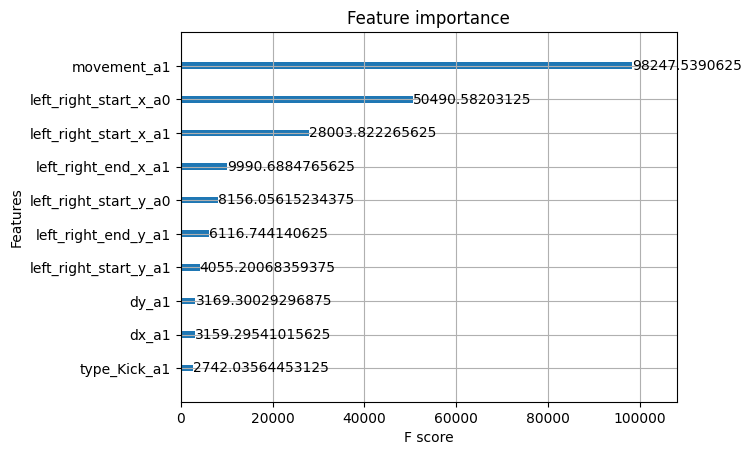

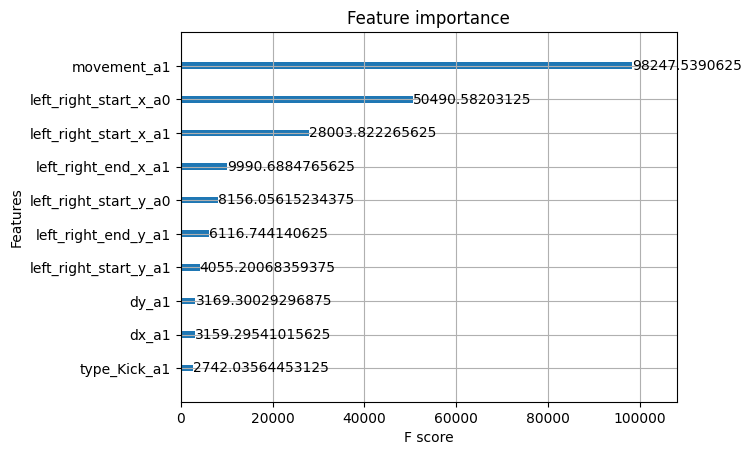

In [18]:
train_xgb_evals.plot_feature_importance(max_num_features=10, importance_type="total_gain")
test_xgb_evals.plot_feature_importance(max_num_features=10, importance_type="total_gain")

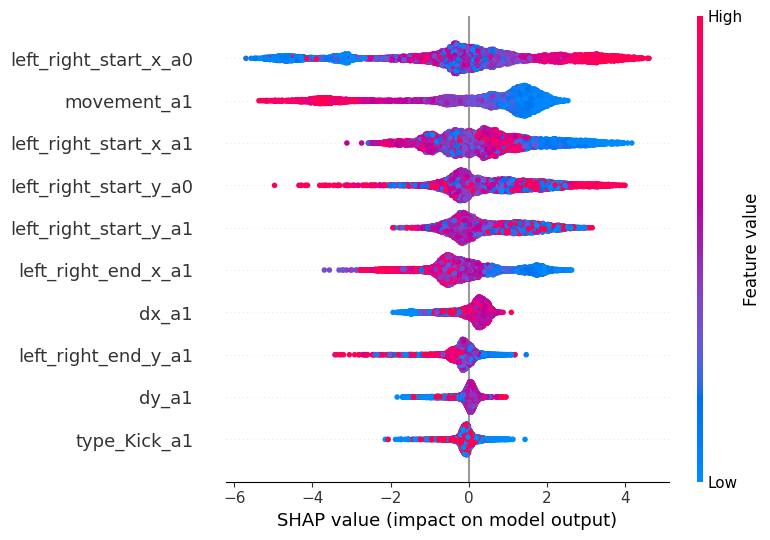

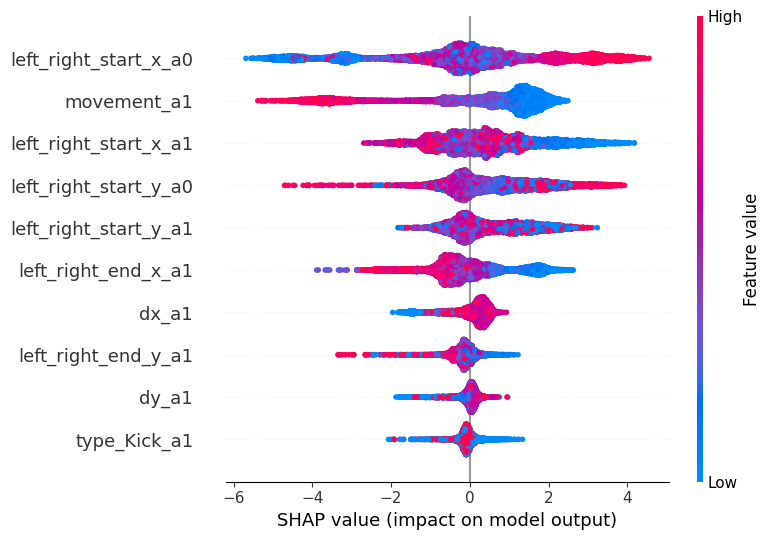

In [19]:
train_xgb_evals.plot_shap_summary_plot()
test_xgb_evals.plot_shap_summary_plot()

In [20]:
top_features = test_xgb_evals.get_ranked_feature_importance()
top_10_features = top_features[:10]
top_10_features

['left_right_start_x_a0',
 'movement_a1',
 'left_right_start_x_a1',
 'left_right_start_y_a0',
 'left_right_start_y_a1',
 'left_right_end_x_a1',
 'dx_a1',
 'left_right_end_y_a1',
 'dy_a1',
 'type_Kick_a1']

In [21]:
# for col in top_10_features:
#     train_xgb_evals.plot_pdp([col])
#     test_xgb_evals.plot_pdp([col])

In [22]:
# for col in top_10_features:
#     train_xgb_evals.plot_ice([col])
#     test_xgb_evals.plot_ice([col])

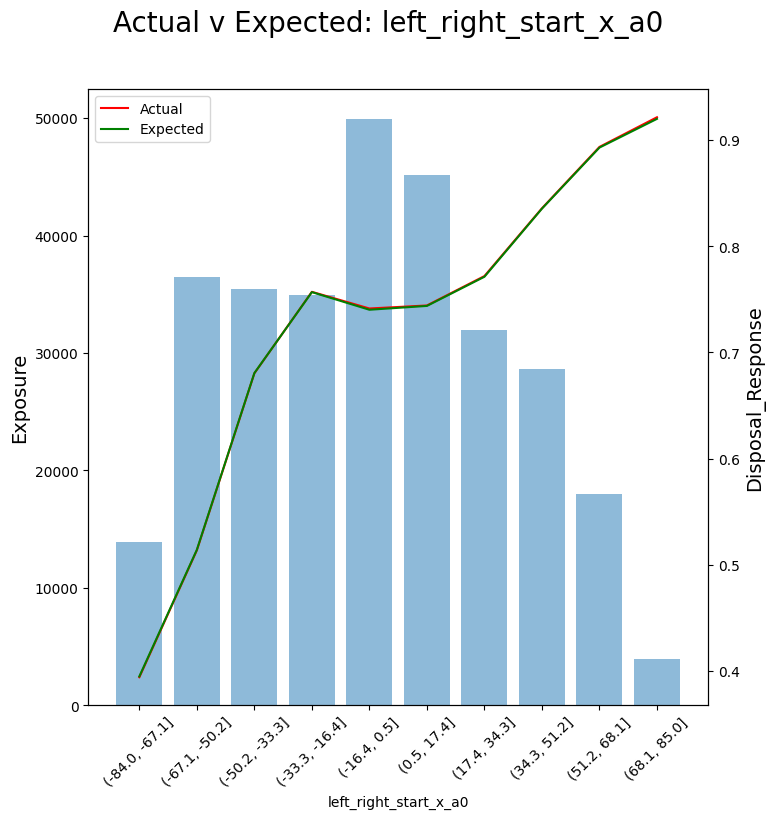

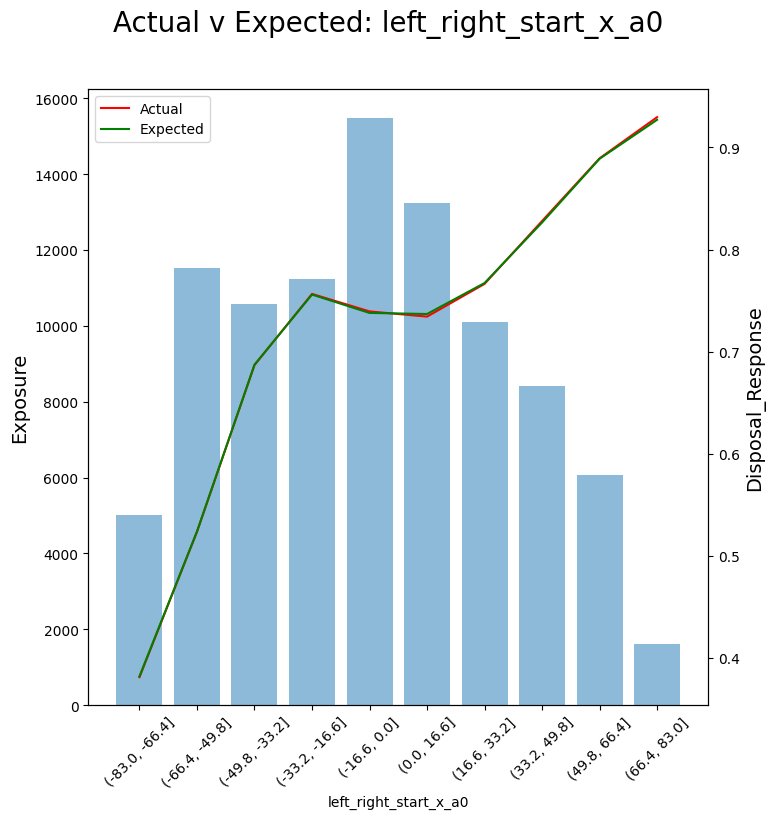

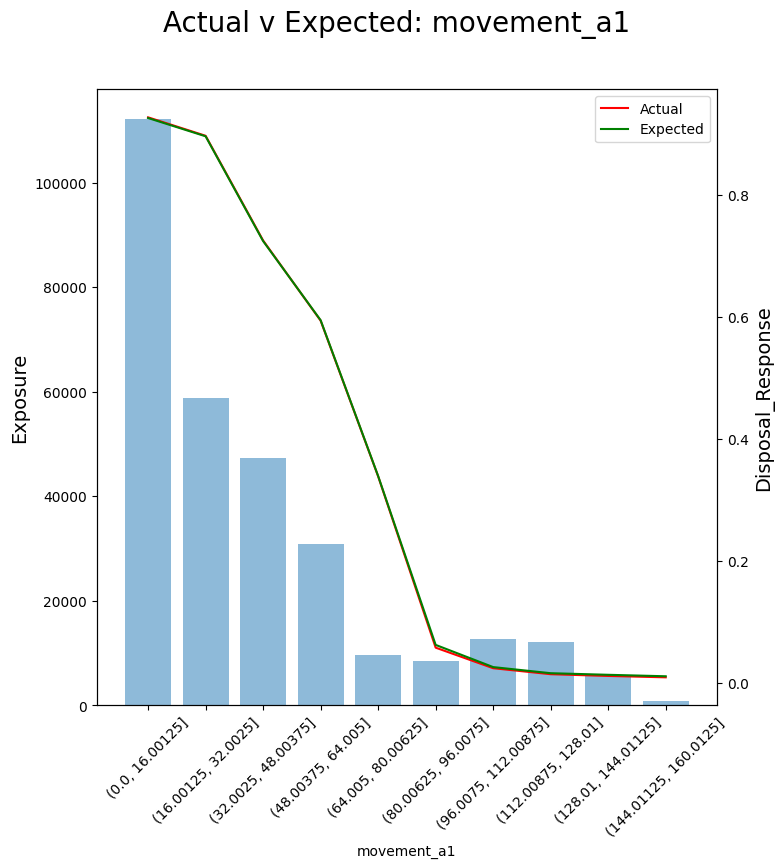

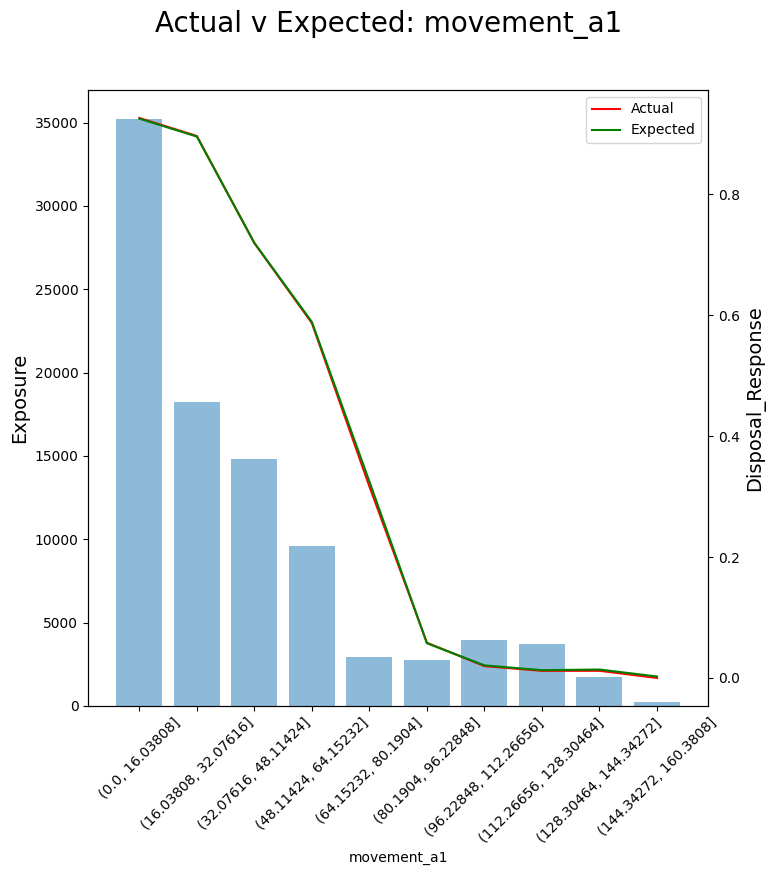

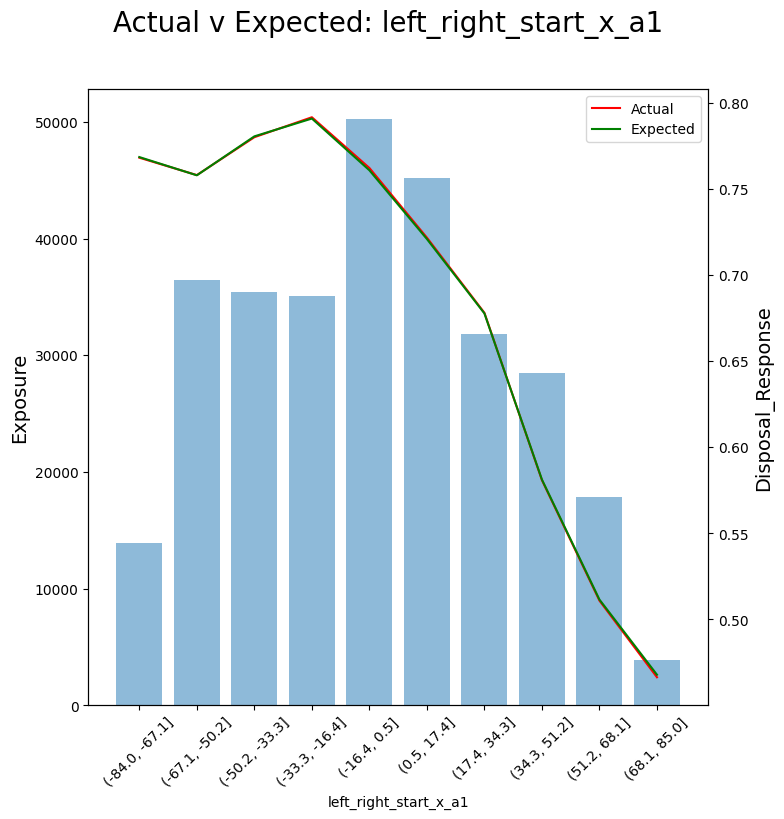

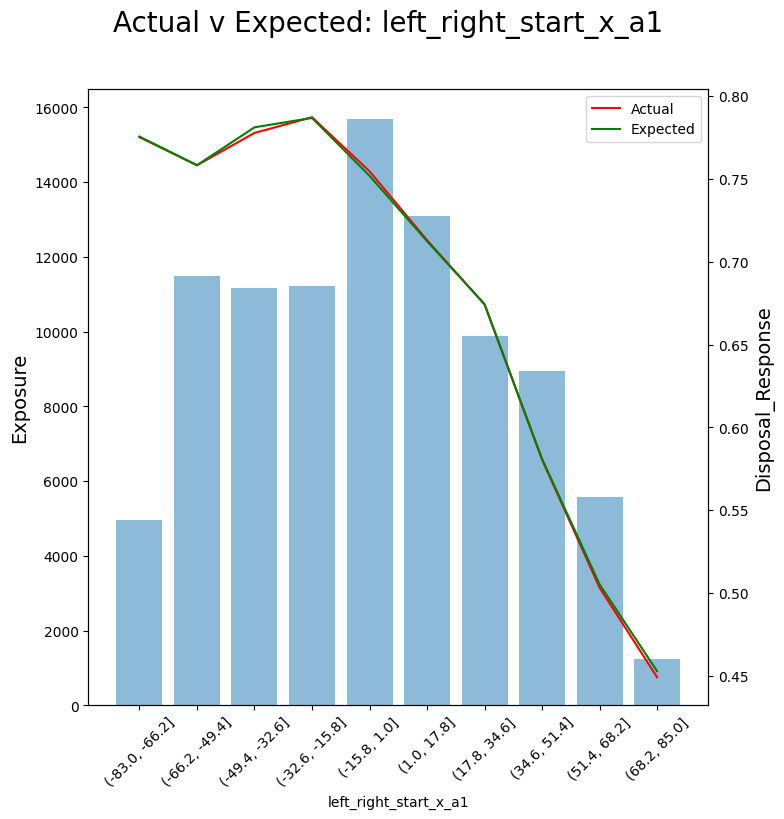

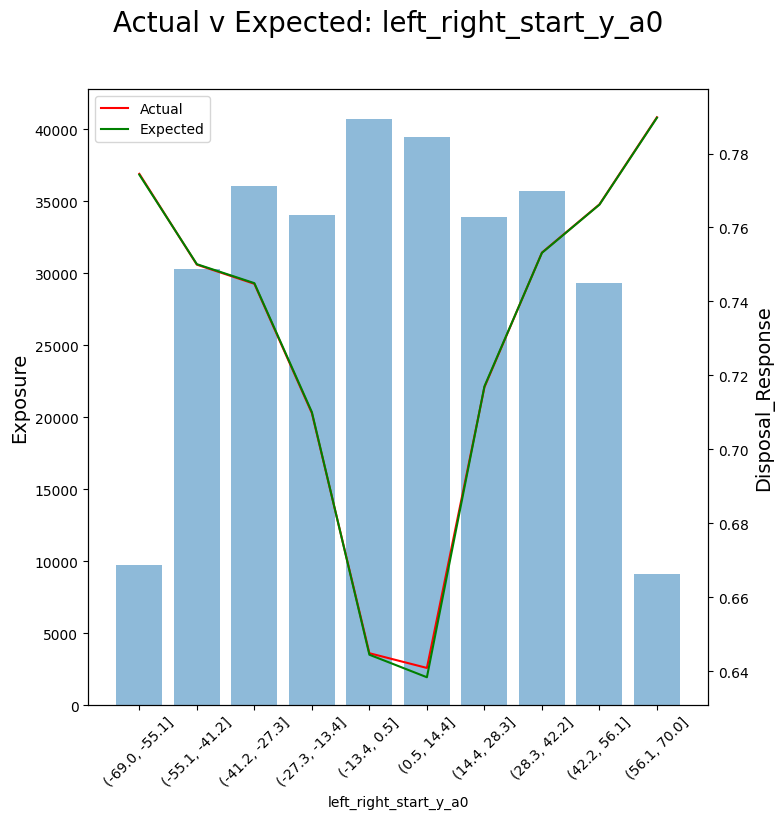

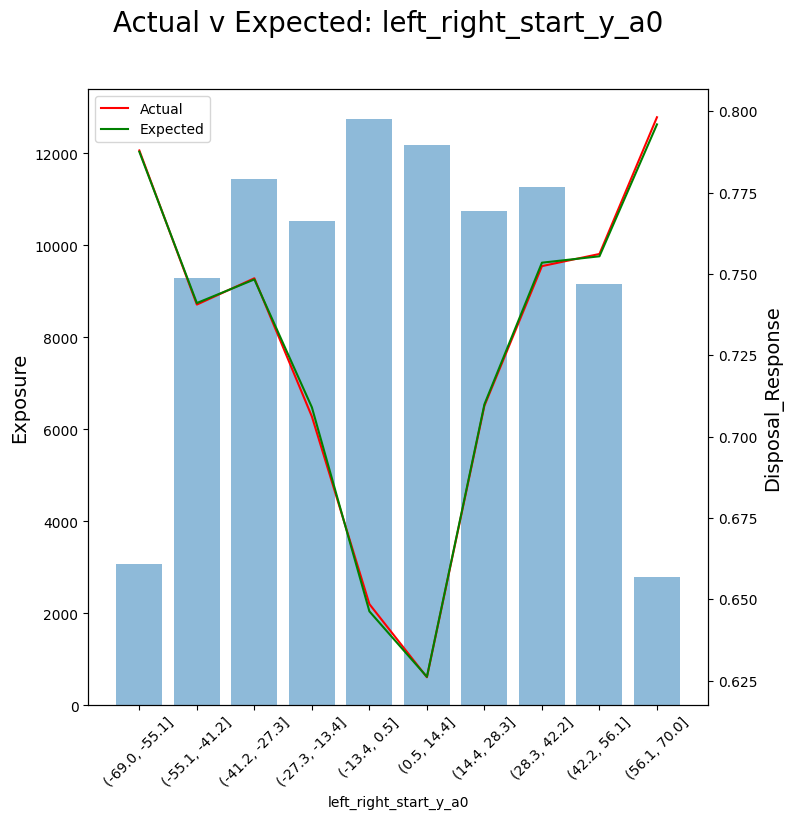

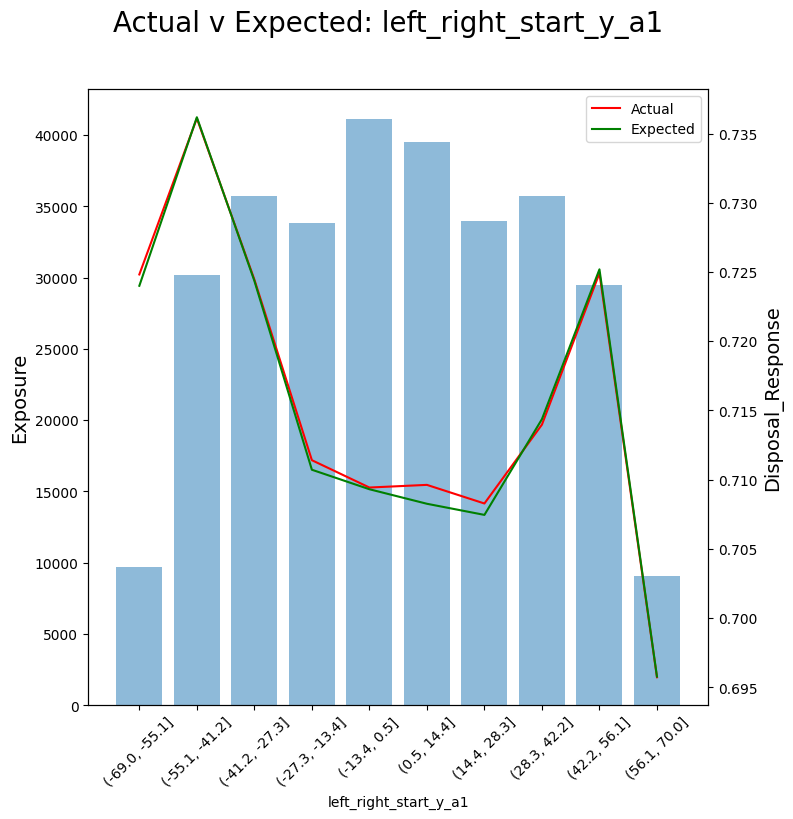

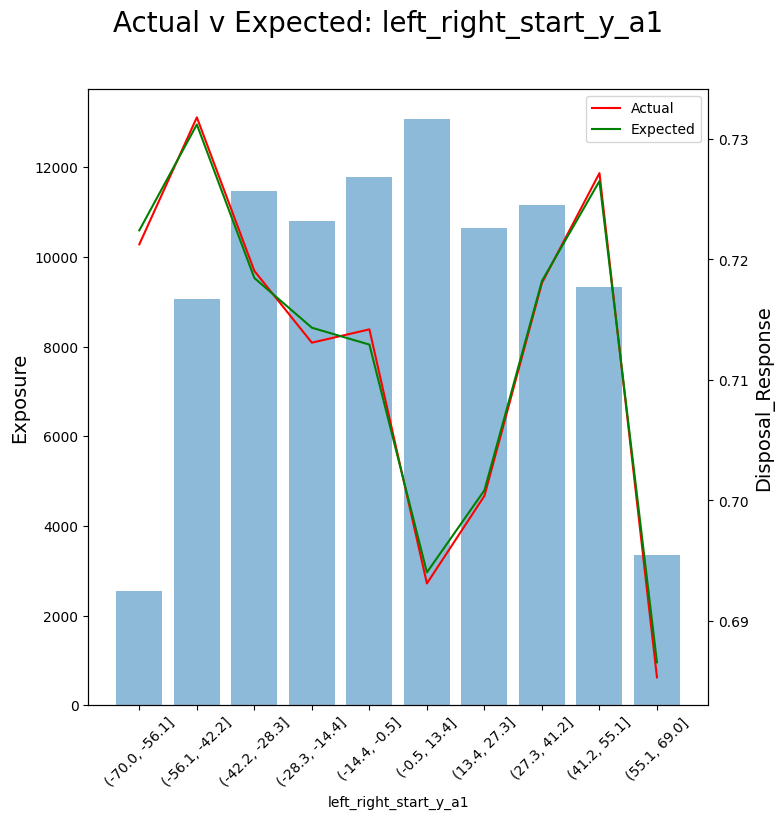

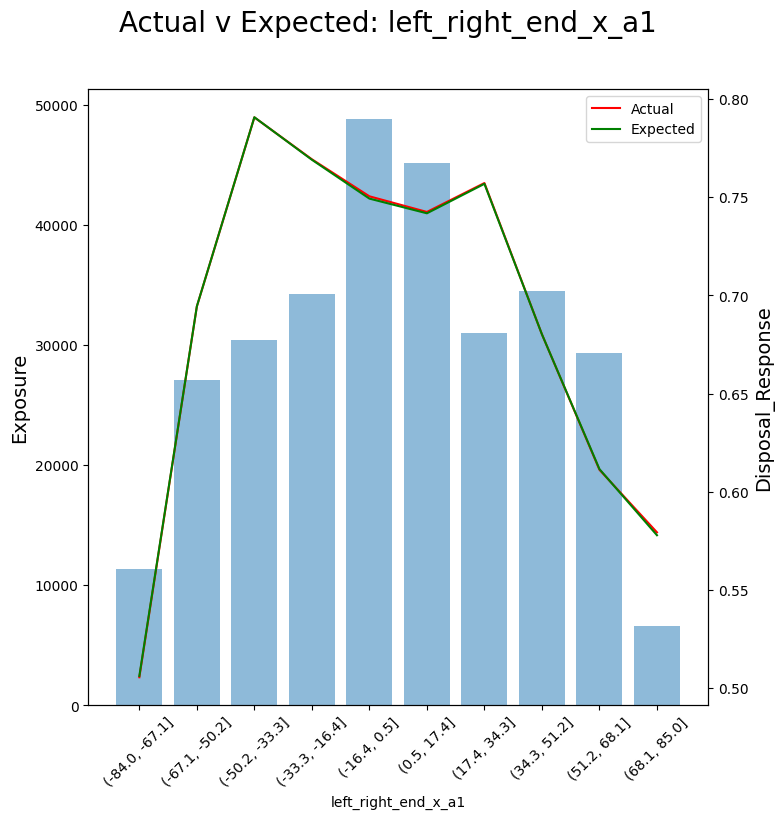

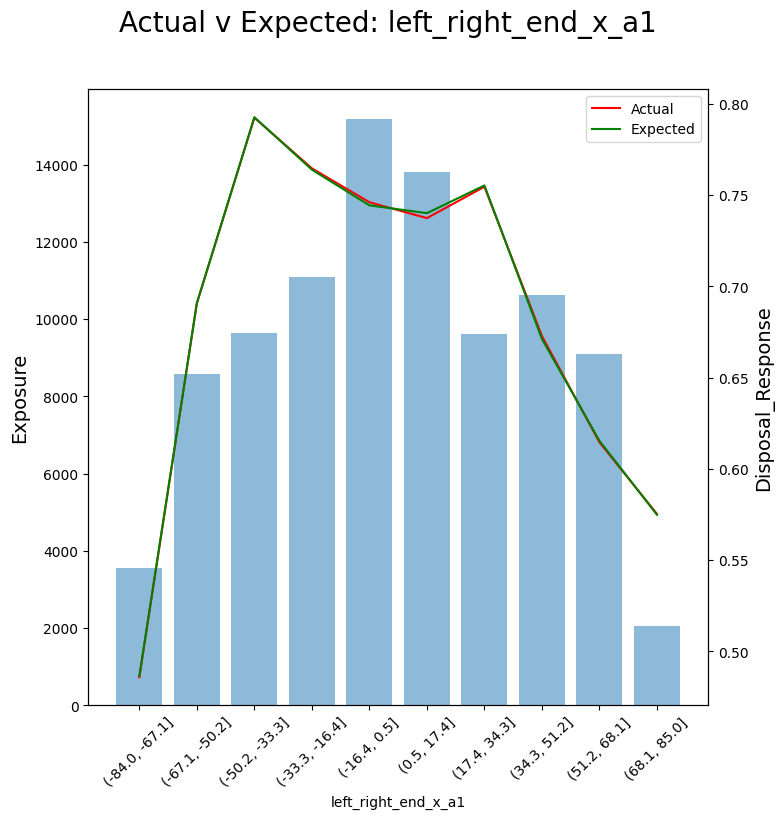

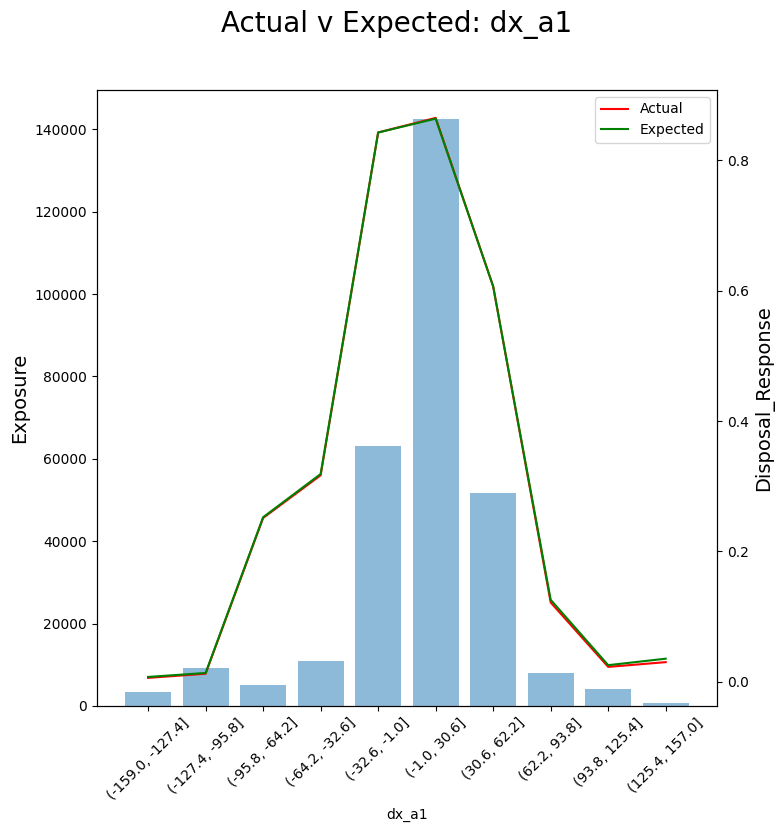

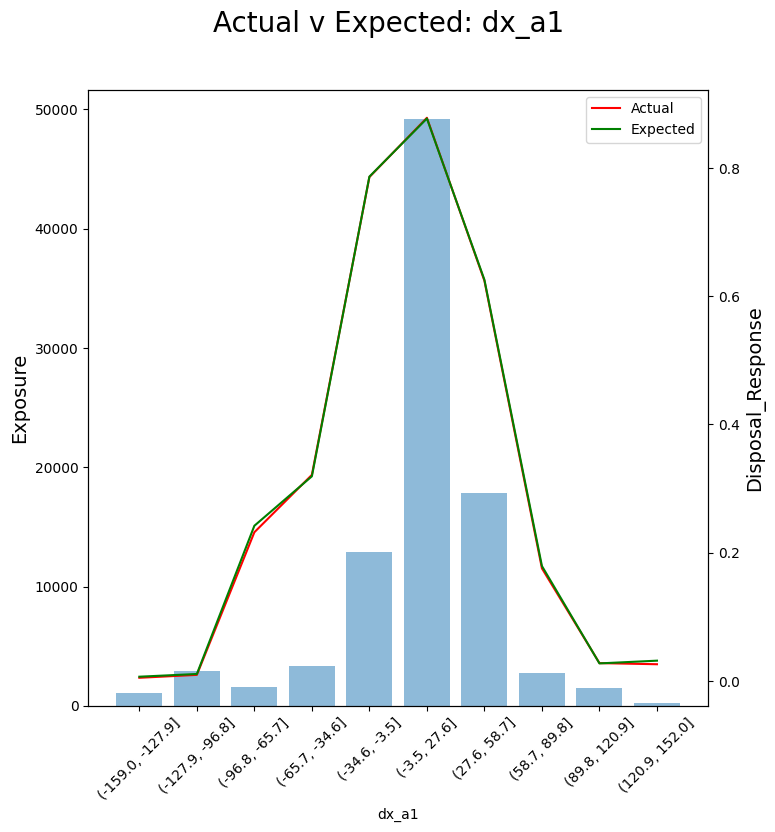

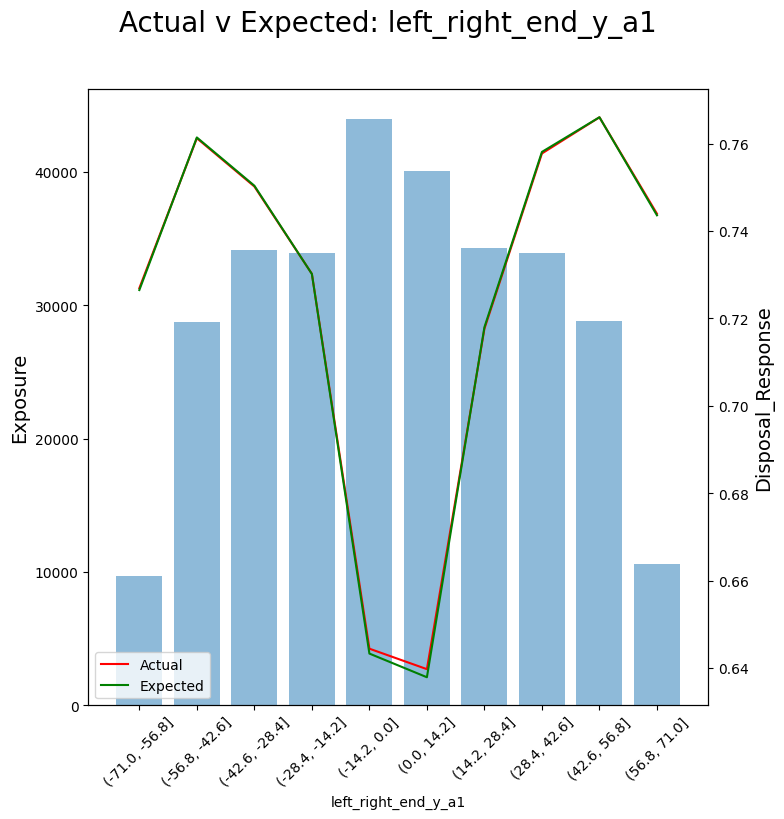

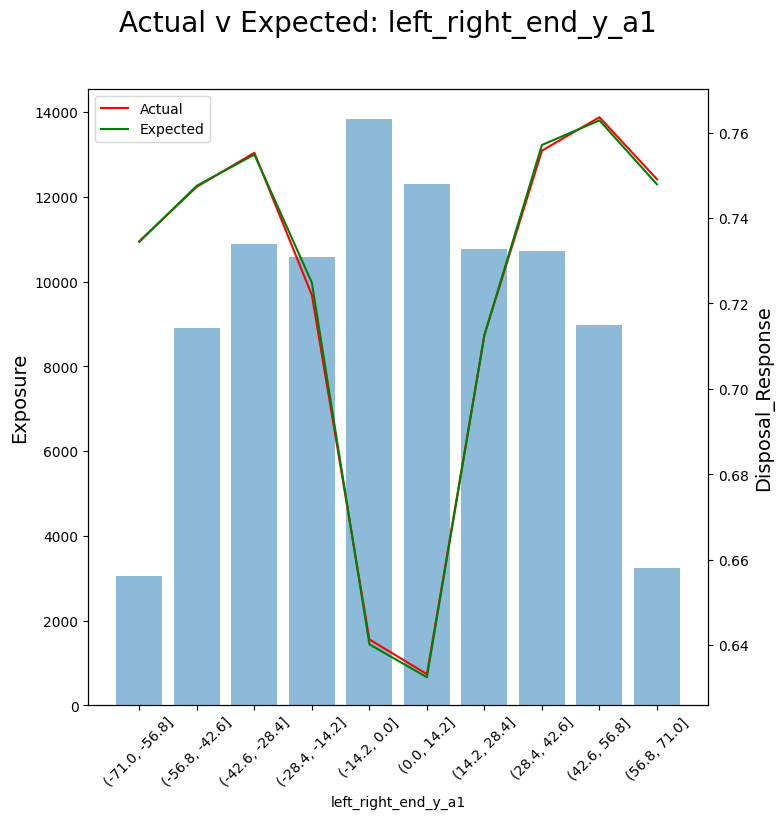

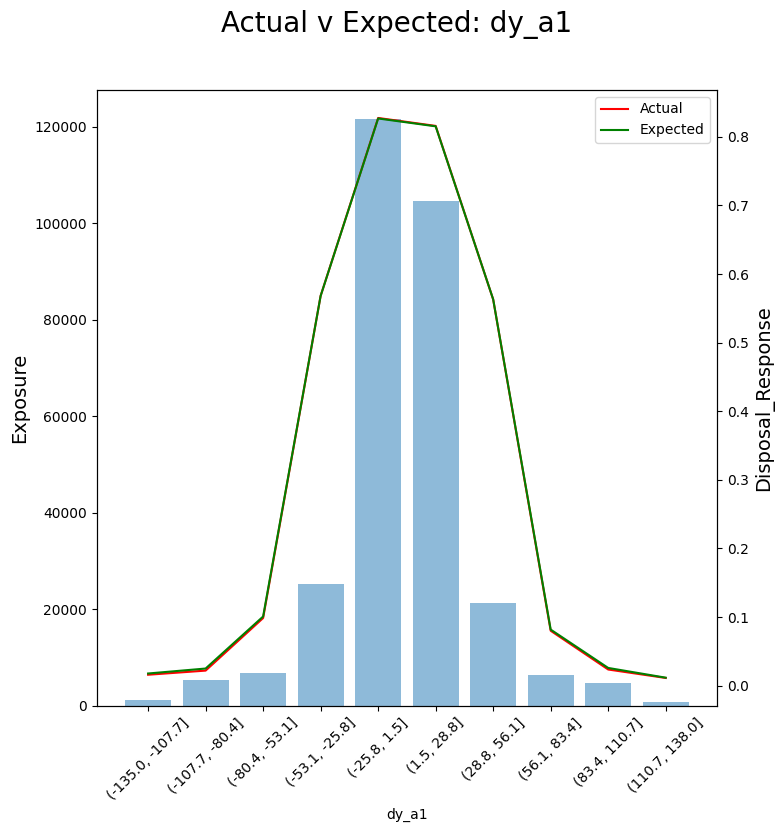

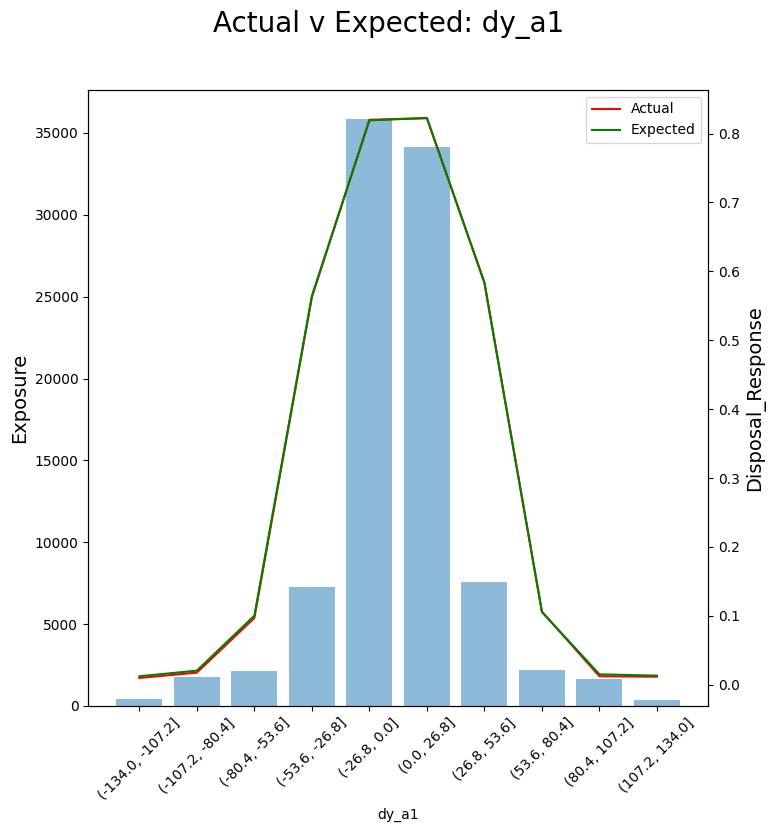

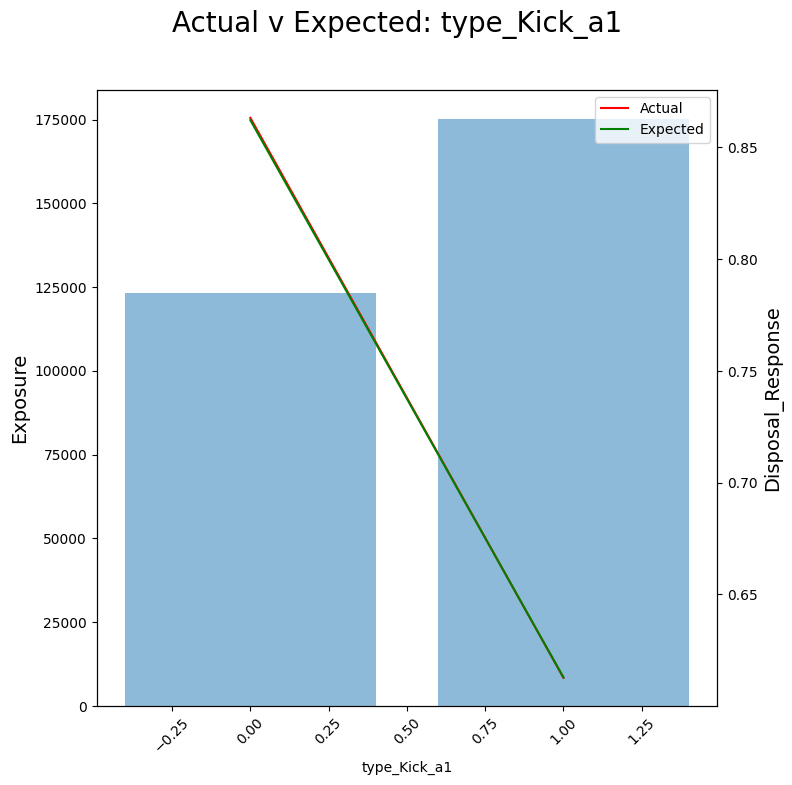

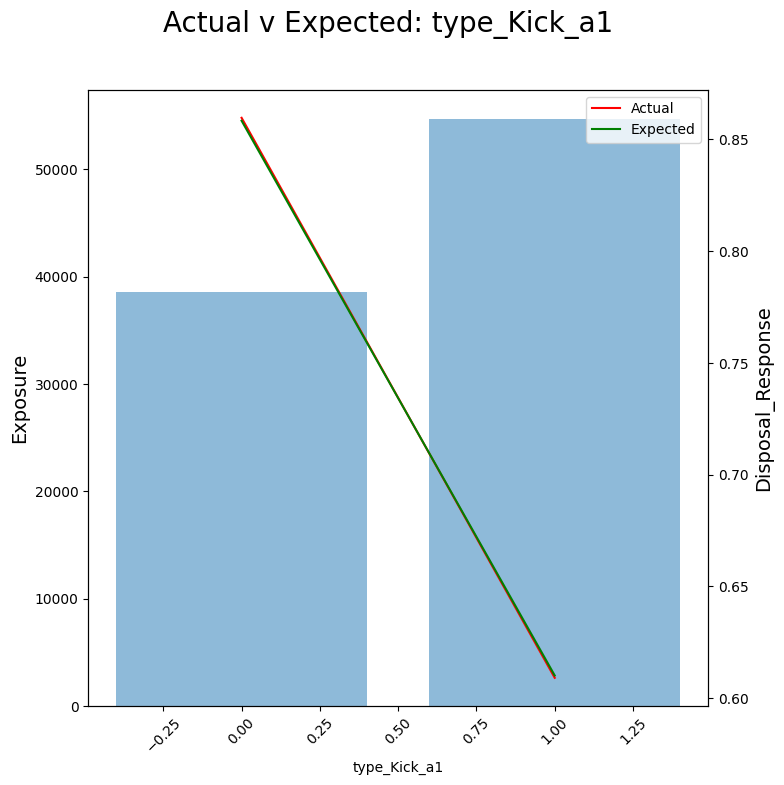

In [23]:
for col in top_10_features:
    train_xgb_evals.plot_feature_ave(col)
    test_xgb_evals.plot_feature_ave(col)

Model Metrics (for probabilities, mainly want calibration curve, logloss and brier score loss)

In [24]:
train_xgb_evals.get_log_loss(), test_xgb_evals.get_log_loss()

Expected Log-Loss: 	0.0437
Expected Log-Loss: 	0.0588


(0.0437001846261355, 0.05880011431827649)

In [25]:
train_xgb_evals.get_brier_score_loss(), test_xgb_evals.get_brier_score_loss()

Expected Brier Score: 	0.0130
Expected Brier Score: 	0.0184


(0.012975572847957936, 0.01838048454958041)

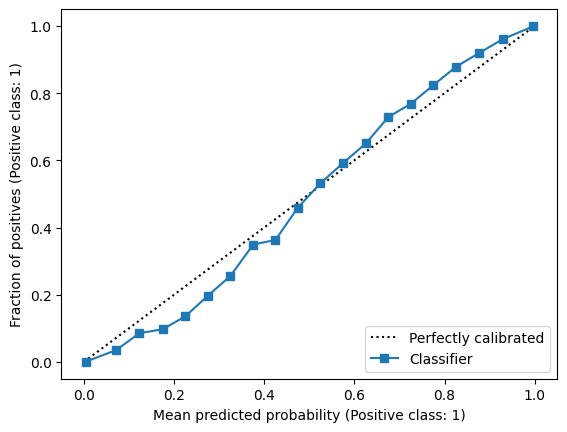

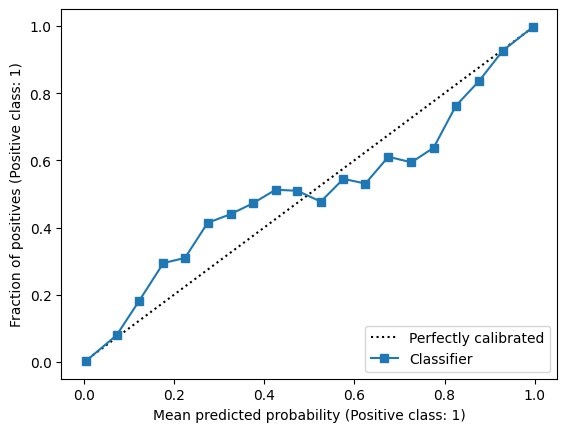

In [26]:
train_xgb_evals.display_calibration_curve(nbins=20)
test_xgb_evals.display_calibration_curve(nbins=20)